# Flood Assesment - Remote Sensing

## Abstract

The present study intends to analyze multi-sensor satellite data to evaluate crop production losses in Sindh province (Pakistan) during recent floods. As a part of the loss and damage (L&D) assessment methodologies, data from a Synthetic Aperture Radar (SAR) satellite (Sentinel 1) used to efficiently map flood extent were compared with data from an optical satellite (Sentinel 2) used to detect differences in vegetation cover before and after the flood through a satellite-derived Normalized Difference Vegetation Index (NDVI).
More specifically, the severity of the 2024 flood that occurred in a specific area of Sindh province was compared to the 2022 flood in the same region which was already previously reported in a reference paper. The outcome of the comparison provides strong evidence for the use of derived-satellite data as a way to assess L&D severity not only for crop production losses but also for affected urban area and exposed population density associated with such a type of natural disaster.


## Introduction

Rising global temperatures, caused by burning fossil fuels, are making rainfalls more frequent and severe across most parts of the world. The resulting climate change has a strong impact on floods.

The present work intends to make a specific study of recent floods in Pakistan which caused significant loss and damage during the heavy monsoon rainfall season in July and August in terms of human lives, agriculture, infrastructure, property, and economy.

A scientific paper evaluating crop production losses during 2022 Pakistan floods was used as a reference to apply multi sensor satellite methodologies relying on Synthetic Aperture Radar (SAR) and Normalized Difference Vegetation Index (NDVI) data.

**SAR methodology:**

Flood extent is mapped using pre- and post-event C-band Synthetic Aperture Radar (SAR) images from Sentinel-1B available on Google Earth Engine (GEE). Due to the specular reflectance of C-band signals, the backscatter from flooded areas or water bodies is significantly lower compared to other non-water areas, which enables rapid extraction of the flooded area from the SAR images. Binary maps indicating flooded and non-flooded areas are created to generate a flood extent map by analysis of the pre-and post-flood images.

**NDVI methodology:**

Loss in biomass greenness is estimated using the reflectance wavebands corresponding to the Red and Near Infra-Red portion of the electro- magnetic spectrum based on the pre- and post-flood images of Sentinel-2 according to the following formula:

$$ NDVI= \frac{NIRσ-Redσ }{NIRσ +Redσ} $$

where NIRσ denotes the NIR reflectance band and Redσ corresponds to the Red reflectance bands. The NDVI is derived from all the available satellite images over the study area.
To compensate for the noise in the data, maximum NDVI value composite images over a period of observation are developed for pre-flood and post-flood periods.  
A delta NDVI image is derived from the pre and post-flood NDVI composite images according to the following formula

$$ \Delta NDVI(\text{Loss or Gain(%)}) = \frac{NDVI_f - NDVI_n }{NVDIn \cdot 100} $$

where NDVIf and NDVIn represents post and pre-flood NDVI composite images, respectively.

The resulting loss and damage map to the biomass greenness is masked by the cropland mask derived from the ESA’s World Cover at 10 m resolution. It can also be masked  by the flood extent map derived from the SAR methodology to distinguish the damage from continuous inundation and incidental rainfall.

**Outline of the present study**

In a first stage, the SAR methodology is applied to reproduce the work conducted in the reference paper and to ensure consistency of our results with those mentioned in the reference study. Then it is applied to the 2024 case to analyze the extension of the flood of this year.

In a second stage, the NDVI methodology is used to analyze the loss and damage observed during 2022 and 2024 Pakistan floods and to compare the biomass greenness between the two years.

Finally, we will combine the results to try and conclude if indeed the loss of biomass greenness is linked to the floods and to compare both floods and their effects on the crops.

**Geographical area of interest**

Our study focuses on a geographical area located in Sindh province and extending from longitude 67° to 69° and from latitude 27° to 28°.

**Time periods of observation**

Our start and end dates for the 2021 pre-flood period are the following:

SAR:  from 2021-08-22 to 2021-09-03

NVDI: from 2021-08-22 to 2021-09-03


Our start and end dates for the 2022 post-flood period are the following:

SAR:  from 2022-08-22 to 2022-09-03

NVDI: from 2022-08-22 to 2022-09-03

Our start and end dates for the 2024 new post-flood period are the following:

SAR:  from 2024-08-30 to 2024-09-10

NVDI: from 2024-08-30 to 2024-09-10

### Implementation

In [ ]:
# this python notebook imports functions from Google Earth Engine
import ee   # ee = earth engine
ee.Authenticate()
ee.Initialize(project='ee-jmafg66')

In [ ]:
# we import python libraries
import pandas as pd
import geemap
import altair as alt
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# we define the study area as a fraction of Sindh Province
#aoi = ee.Geometry.Polygon([[[67, 27], [69, 27], [69, 28], [67, 28], [67, 27]]])
aoisar = ee.Geometry.Polygon([[[68.75, 27.5], [69, 27.5], [69, 27.85], [68.75, 27.85], [68.75, 27.5]]])
Map = geemap.Map()
#Map.centerObject(aoi, 9)
Map.centerObject(aoisar, 9)
#Map.addLayer(aoi, {'color': 'red'}, 'AOI')
Map.addLayer(aoisar, {'color': 'blue'}, 'AOIsar')
Map

Map(center=[27.674962642324985, 68.87499999999925], controls=(WidgetControl(options=['position', 'transparent_…

In [ ]:
# we define the observation period dates
pre_flood_start = '2021-08-22' #2021: reference year without flooding
pre_flood_end = '2021-09-03'
post_flood_start = '2022-08-22' #2022: year with floods, impact study is conducted right after flooding
post_flood_end = '2022-09-03'
new_post_flood_start = '2024-08-30' #2024: new year with recurring floods, impact study is conducted right after flooding
new_post_flood_end = '2024-09-10'


## RADAR
- for 2024


In [ ]:
# *===========================================================================================
#                      SAR-FLOOD MAPPING USING A CHANGE DETECTION APPROACH
# ===========================================================================================
#  Within this script SAR Sentinel-1 is being used to generate a flood extent map. A change
#  detection approach was chosen, where a before- and after-flood event image will be compared.
#  Sentinel-1 GRD imagery is being used. Ground Range Detected imagery includes the following
#  preprocessing steps: Thermal-Noise Removal, Radiometric calibration, Terrain-correction
#  hence only a Speckle filter needs to be applied in the preprocessing.
#
#  ===========================================================================================

In [ ]:
# we select period BEFORE the flood
# from 2021-08-22 to 2021-09-03
before_start, before_end = ('2021-08-22', '2021-09-03')
# Now set the same parameters for AFTER the flood
# from 2022-08-22 to 2022-09-03
after2022_start, after2022_end = ('2024-08-22', '2024-09-03')
# from 2024-08-30 to 2022-09-10
after2024_start, after2024_end = ('2024-08-30', '2024-09-10')
# we set SAR parameters
polarization = "VH"
pass_direction = "DESCENDING"
ratio_threshold = 1.25

In [ ]:
# Load and filter Sentinel-1 GRD data by predefined parameters
collection = ee.ImageCollection('COPERNICUS/S1_GRD')\
.filter(ee.Filter.eq('instrumentMode','IW'))\
.filter(ee.Filter.listContains('transmitterReceiverPolarisation',polarization))\
.filter(ee.Filter.eq('orbitProperties_pass',pass_direction))\
.filter(ee.Filter.eq('resolution_meters', 10))\
.filterBounds(aoisar)

In [ ]:
# Select images by predefined dates
before_collection = collection.filterDate(before_start, before_end)
after2022_collection = collection.filterDate(after2022_start, after2022_end)
after2024_collection = collection.filterDate(after2024_start, after2024_end)

In [ ]:
# Print selected tiles to the console
# Extract date from meta data
def dates(imgcol):
  range = imgcol.reduceColumns(ee.Reducer.minMax(), ["system:time_start"])
  printed = ee.String('from ') \
  .cat(ee.Date(range.get('min')).format('YYYY-MM-dd')) \
  .cat(' to ') \
  .cat(ee.Date(range.get('max')).format('YYYY-MM-dd'))
  return printed.getInfo()

In [ ]:
# print dates of before images to console
# print dates of after images to console
before_count = before_collection.size().getInfo()
print('Images selected Before Flood:',before_count,
      dates(before_collection))
after2022_count = after2022_collection.size().getInfo()
print('Images selected After Flood:',after2022_count,
  dates(after2022_collection))
after2024_count = after2024_collection.size().getInfo()
print('Images selected After Flood:',after2024_count,
  dates(after2024_collection))

Images selected Before Flood: 3 from 2021-08-23 to 2021-08-30
Images selected After Flood: 3 from 2024-08-26 to 2024-08-31


In [ ]:
# Create a mosaic of selected tiles and clip to study area
before = before_collection.mosaic().clip(aoisar)
after2022 = after2022_collection.mosaic().clip(aoisar)
after2024 = after2024_collection.mosaic().clip(aoisar)

before = before.reproject(**{
    'crs': 'EPSG:2062',
    'scale': 10
  })

after2022 = after2022.reproject(**{
    'crs': 'EPSG:2062',
    'scale': 10
  })

after2024 = after2024.reproject(**{
    'crs': 'EPSG:2062',
    'scale': 10
  })

In [ ]:
# The user running the script is required to select ONE of the two following options:
# FIRST OPTION: apply UN method filter to the mosaic
# Reduce the radar speckle by smoothing
smoothing_radius = 50;
before_filtered = before.focal_mean(smoothing_radius, 'circle', 'meters');
after2022_filtered = after2022.focal_mean(smoothing_radius, 'circle', 'meters');
after2024_filtered = after2024.focal_mean(smoothing_radius, 'circle', 'meters');

In [ ]:
# SECOND OPTION: apply LEE filter to the mosaic
# Define LEE filter

def powerToDb(img):
  return ee.Image(10).multiply(img.log10())

def dbToPower(img):
  return ee.Image(10).pow(img.divide(10))

def RefinedLee(image):
    """
    This filter is modified from the implementation by Guido Lemoine
    Source: Lemoine et al. https://code.earthengine.google.com/5d1ed0a0f0417f098fdfd2fa137c3d0c

    Parameters
    ----------
    image: ee.Image
        Image to be filtered

    Returns
    -------
    result: ee.Image
        Filtered Image

    """

    bandNames = image.bandNames().remove('angle')

    def inner(b):

        img = image.select([b]);
        img = dbToPower(img)

        # img must be linear, i.e. not in dB!
        # Set up 3x3 kernels
        weights3 = ee.List.repeat(ee.List.repeat(1,3),3)
        kernel3 = ee.Kernel.fixed(3,3, weights3, 1, 1, False)

        mean3 = img.reduceNeighborhood(ee.Reducer.mean(), kernel3)
        variance3 = img.reduceNeighborhood(ee.Reducer.variance(), kernel3)

        # Use a sample of the 3x3 windows inside a 7x7 windows to determine gradients and directions
        sample_weights = ee.List([[0,0,0,0,0,0,0], [0,1,0,1,0,1,0],[0,0,0,0,0,0,0], [0,1,0,1,0,1,0], [0,0,0,0,0,0,0], [0,1,0,1,0,1,0],[0,0,0,0,0,0,0]])

        sample_kernel = ee.Kernel.fixed(7,7, sample_weights, 3,3, False)

        # Calculate mean and variance for the sampled windows and store as 9 bands
        sample_mean = mean3.neighborhoodToBands(sample_kernel)
        sample_var = variance3.neighborhoodToBands(sample_kernel)

        # Determine the 4 gradients for the sampled windows
        gradients = sample_mean.select(1).subtract(sample_mean.select(7)).abs()
        gradients = gradients.addBands(sample_mean.select(6).subtract(sample_mean.select(2)).abs())
        gradients = gradients.addBands(sample_mean.select(3).subtract(sample_mean.select(5)).abs())
        gradients = gradients.addBands(sample_mean.select(0).subtract(sample_mean.select(8)).abs())

        # And find the maximum gradient amongst gradient bands
        max_gradient = gradients.reduce(ee.Reducer.max())

        # Create a mask for band pixels that are the maximum gradient
        gradmask = gradients.eq(max_gradient)

        # duplicate gradmask bands: each gradient represents 2 directions
        gradmask = gradmask.addBands(gradmask)

        # Determine the 8 directions
        directions = sample_mean.select(1).subtract(sample_mean.select(4)).gt(sample_mean.select(4).subtract(sample_mean.select(7))).multiply(1)
        directions = directions.addBands(sample_mean.select(6).subtract(sample_mean.select(4)).gt(sample_mean.select(4).subtract(sample_mean.select(2))).multiply(2))
        directions = directions.addBands(sample_mean.select(3).subtract(sample_mean.select(4)).gt(sample_mean.select(4).subtract(sample_mean.select(5))).multiply(3))
        directions = directions.addBands(sample_mean.select(0).subtract(sample_mean.select(4)).gt(sample_mean.select(4).subtract(sample_mean.select(8))).multiply(4))
        # The next 4 are the not() of the previous 4
        directions = directions.addBands(directions.select(0).Not().multiply(5))
        directions = directions.addBands(directions.select(1).Not().multiply(6))
        directions = directions.addBands(directions.select(2).Not().multiply(7))
        directions = directions.addBands(directions.select(3).Not().multiply(8))

        # Mask all values that are not 1-8
        directions = directions.updateMask(gradmask)

        # "collapse" the stack into a singe band image (due to masking, each pixel has just one value (1-8) in it's directional band, and is otherwise masked)
        directions = directions.reduce(ee.Reducer.sum());

        sample_stats = sample_var.divide(sample_mean.multiply(sample_mean))

        #Calculate localNoiseVariance
        sigmaV = sample_stats.toArray().arraySort().arraySlice(0,0,5).arrayReduce(ee.Reducer.mean(), [0])

        # Set up the 7*7 kernels for directional statistics
        rect_weights = ee.List.repeat(ee.List.repeat(0,7),3).cat(ee.List.repeat(ee.List.repeat(1,7),4))

        diag_weights = ee.List([[1,0,0,0,0,0,0], [1,1,0,0,0,0,0], [1,1,1,0,0,0,0], [1,1,1,1,0,0,0], [1,1,1,1,1,0,0], [1,1,1,1,1,1,0], [1,1,1,1,1,1,1]]);

        rect_kernel = ee.Kernel.fixed(7,7, rect_weights, 3, 3, False)
        diag_kernel = ee.Kernel.fixed(7,7, diag_weights, 3, 3, False)

        # Create stacks for mean and variance using the original kernels. Mask with relevant direction.
        dir_mean = img.reduceNeighborhood(ee.Reducer.mean(), rect_kernel).updateMask(directions.eq(1))
        dir_var = img.reduceNeighborhood(ee.Reducer.variance(), rect_kernel).updateMask(directions.eq(1))

        dir_mean = dir_mean.addBands(img.reduceNeighborhood(ee.Reducer.mean(), diag_kernel).updateMask(directions.eq(2)))
        dir_var = dir_var.addBands(img.reduceNeighborhood(ee.Reducer.variance(), diag_kernel).updateMask(directions.eq(2)))

        # and add the bands for rotated kernels
        for i in range(1, 4):
            dir_mean = dir_mean.addBands(img.reduceNeighborhood(ee.Reducer.mean(), rect_kernel.rotate(i)).updateMask(directions.eq(2*i+1)))
            dir_var = dir_var.addBands(img.reduceNeighborhood(ee.Reducer.variance(), rect_kernel.rotate(i)).updateMask(directions.eq(2*i+1)))
            dir_mean = dir_mean.addBands(img.reduceNeighborhood(ee.Reducer.mean(), diag_kernel.rotate(i)).updateMask(directions.eq(2*i+2)))
            dir_var = dir_var.addBands(img.reduceNeighborhood(ee.Reducer.variance(), diag_kernel.rotate(i)).updateMask(directions.eq(2*i+2)))


        # "collapse" the stack into a single band image (due to masking, each pixel has just one value in it's directional band, and is otherwise masked)
        dir_mean = dir_mean.reduce(ee.Reducer.sum());
        dir_var = dir_var.reduce(ee.Reducer.sum());

        # A finally generate the filtered value
        varX = dir_var.subtract(dir_mean.multiply(dir_mean).multiply(sigmaV)).divide(sigmaV.add(1.0))

        b = varX.divide(dir_var)
        result = dir_mean.add(b.multiply(img.subtract(dir_mean)))
        result = powerToDb(result)
        return result.arrayProject([0]).arrayFlatten([['sum']]).float()

    result = ee.ImageCollection(bandNames.map(inner)).toBands().rename(bandNames).copyProperties(image)

    return image.addBands(result, None, True)

# LEE filtering
after2022_filtered = RefinedLee(after2022).select(polarization)
after2024_filtered = RefinedLee(after2024).select(polarization)
before_filtered = RefinedLee(before).select(polarization)

In [ ]:
#------------------------------- FLOOD EXTENT CALCULATION -------------------------------//
# Calculate the difference between the before and after images
ratio2022 = after2022_filtered.divide(before_filtered)
ratio2024 = after2024_filtered.divide(before_filtered)
# Apply the predefined difference-threshold and create the flood extent mask
diff2022 = after2022_filtered.lt(0)
ratio_binary2022 = ratio2022.gt(ratio_threshold).multiply(diff2022)

diff2024 = after2024_filtered.lt(0)
ratio_binary2024 = ratio2024.gt(ratio_threshold).multiply(diff2024)

In [ ]:
# Display filtered mosaic
Map = geemap.Map()

Map.centerObject(aoisar,10);
Map.addLayer(after2022.select(polarization), {'min': -25,'max': 5},"after")
Map.addLayer(after2024.select(polarization), {'min': -25,'max': 5},"after")
Map.addLayer(before.select(polarization), {'min': -25,'max': 5},"before")
Map.addLayer(after2022_filtered.select('VH'), {'min': -25,'max': 5},"sp_a")
Map.addLayer(after2024_filtered.select('VH'), {'min': -25,'max': 5},"sp_a")
Map.addLayer(before_filtered.select('VH'), {'min': -25,'max': 5},"sp_b")

Map

Map(center=[27.674962642324985, 68.87499999999925], controls=(WidgetControl(options=['position', 'transparent_…

In [ ]:
# Refine flood result using additional datasets

# Include JRC layer on surface water seasonality to mask flood pixels from areas
# of "permanent" water (where there is water > 10 months of the year)
swater = ee.Image('JRC/GSW1_4/GlobalSurfaceWater').select('seasonality')
# Flooded layer where perennial water bodies (water > 10 mo/yr) is assigned a 0 value
swater_mask = swater.gte(10).updateMask(swater.gte(10))
# inal flooded area without pixels in perennial waterbodies
flooded_mask2022 = ratio_binary2022.where(swater_mask, 0)
flooded_mask2024 = ratio_binary2024.where(swater_mask, 0)
flooded_bodies2022 = flooded_mask2022.updateMask(flooded_mask2022)
flooded_bodies2024 = flooded_mask2024.updateMask(flooded_mask2024)

In [ ]:
# filter isolated pixels
# Compute connectivity of pixels to eliminate those connected to 8 or fewer neighbours
# This operation reduces noise of the flood extent product
connections2022 = flooded_bodies2022.connectedPixelCount()
flooded_isolated2022 = flooded_bodies2022.updateMask(connections2022.gte(8))

connections2024 = flooded_bodies2024.connectedPixelCount()
flooded_isolated2024 = flooded_bodies2024.updateMask(connections2024.gte(8))

In [ ]:
# Mask out areas with more than 5 percent slope using a Digital Elevation Model
DEM = ee.Image('WWF/HydroSHEDS/03VFDEM')
terrain = ee.Algorithms.Terrain(DEM)
slope = terrain.select('slope')
flooded2022 = flooded_isolated2022.updateMask(slope.lt(5))
flooded2024 = flooded_isolated2024.updateMask(slope.lt(5))

In [ ]:
# Calculate flood extent area
# Create a raster layer containing the area information of each pixel
flood_pixelarea2022 = flooded2022.multiply(ee.Image.pixelArea());
flood_pixelarea2024 = flooded2024.multiply(ee.Image.pixelArea());
# Sum the areas of flooded pixels
# default is set to 'bestEffort: true' in order to reduce computation time
flood_stats2022 = flood_pixelarea2022.reduceRegion(**{
  'reducer': ee.Reducer.sum(),
  'geometry': aoisar,
  'scale': 10,
  'maxPixels':1e13,
  'bestEffort': True,
  'tileScale': 4
  });

flood_stats2024 = flood_pixelarea2024.reduceRegion(**{
  'reducer': ee.Reducer.sum(),
  'geometry': aoisar,
  'scale': 10,
  'maxPixels':1e13,
  'bestEffort': True,
  'tileScale': 4
  });

# Convert the flood extent to hectares (area calculations are originally given in meters)
flood_area_ha2022 = flood_stats2022.getNumber(polarization).divide(10000).round();
flood_area_ha2024 = flood_stats2024.getNumber(polarization).divide(10000).round();
print('Flooded area (ha): ', flood_area_ha2022.getInfo());
print('Flooded area (ha): ', flood_area_ha2024.getInfo());

Flooded area (ha):  7963


In [ ]:
# Reset the map
Map = geemap.Map()

Map.centerObject(aoisar,11);
Map.addLayer(after2022.select('VH'), {'min': -25,'max': 5},"after flood 2022") # Map.addLayer(after {'min': -25,'max': 5, 'bands' : ['VV']},"after flood")
Map.addLayer(flooded_bodies2022,{'palette':"00FFFF"}, name = "bodies 2022")
Map.addLayer(flooded_isolated2022, {'palette':"red"},name = "isolated 2022")
Map.addLayer(flooded2022,{'palette':"green"}, name = "Final 2022")

Map.addLayer(after2024.select('VH'), {'min': -25,'max': 5},"after flood 2024") # Map.addLayer(after {'min': -25,'max': 5, 'bands' : ['VV']},"after flood")
Map.addLayer(flooded_bodies2024,{'palette':"00FFFF"}, name = "bodies 2024")
Map.addLayer(flooded_isolated2024, {'palette':"red"},name = "isolated 2024")
Map.addLayer(flooded2024,{'palette':"green"}, name = "Final 2024")
Map


Map(center=[27.674962642324985, 68.87499999999925], controls=(WidgetControl(options=['position', 'transparent_…

In [ ]:
# Add population count data
population_count = ee.Image("JRC/GHSL/P2023A/GHS_POP/2020").clip(aoisar)

#Reproject the flooded areas to population proj
GHSLprojection = population_count.projection()
flooded_res_pop = flooded.reproject({'crs': GHSLprojection})

In [ ]:
#Calculate the population by pixel
population_exposed = population_count.mask(flooded_res_pop)
#Calculate the number of people impacted
stats = population_exposed.reduceRegion(**{ 'reducer': ee.Reducer.sum(),
'geometry': aoisar,
'scale': 100,
'maxPixels':1e9,
'bestEffort': True
})
number_pp_exposed = stats.getNumber('population_count').round()
# print('Number of people impacted: ', number_pp_exposed)

In [ ]:
#Open Land cover dataset
LC = ee.ImageCollection('MODIS/061/MCD12Q1')\
  .filterDate('2023-01-01',after_end)\
  .select("LC_Type1")\
  .first()\
  .clip(aoisar)
#Reproject the flooded areas to LC proj
MODISprojection = LC.projection();
flooded_res_LC = flooded.reproject(**{'crs': MODISprojection})

In [ ]:
#Calculate the urban area
urbanmask = LC.eq(13)
# Only select "urban"
urban = LC.updateMask(urbanmask)
# only select "Flodded urban"
urban_affected = urban.mask(flooded_res_LC)
# We divide by 13 because 13 = urban
urban_pixelarea = urban_affected.multiply(ee.Image.pixelArea()).divide(13)

In [ ]:
urban_stats = urban_pixelarea.reduceRegion(**{
  'reducer': ee.Reducer.sum(),
  'geometry': aoisar,
  'scale': 100,
})
urban_area_ha = urban_stats.getNumber('LC_Type1').divide(10000).round()

In [ ]:
Map = geemap.Map()

Map.centerObject(aoisar,10);
#SAR mosaic
Map.addLayer(before_filtered.select(polarization), {"min":-25,"max":5}, 'Before Flood', 0)
Map.addLayer(after_filtered.select(polarization), {"min":-25,"max":5}, 'After Flood', 1)

#Flooded areas
Map.addLayer(flooded,{'palette':"red"},'Flooded areas')

#Permanent water bodies
Map.addLayer(swater_mask.clip(aoi),{'palette':"blue"},'Water bodies')

In [ ]:
# Add the population count
populationCountVis = {
'min': 0,
'max': 200.0,
'palette': ['fef0d9','fdcc8a','fc8d59','e34a33','b30000'],
}
Map.addLayer(population_count, populationCountVis, 'Population Density',1)

In [ ]:
# Add the land cover
LCVis = {
  "min": 1.0,
  "max": 17.0,
  "palette": [
'05450a', '086a10', '54a708', '78d203', '009900', 'c6b044', 'dcd159', 'dade48', 'fbff13', 'b6ff05', '27ff87', 'c24f44', 'a5a5a5', 'ff6d4c', '69fff8', 'f9ffa4', '1c0dff'
],
  }
Map.addLayer(LC, LCVis, 'Land Cover', 1)
Map

Map(center=[27.674962642324985, 68.87499999999925], controls=(WidgetControl(options=['position', 'transparent_…

In [ ]:
#resample the flooded mask to 100m pixels
flooded = flooded.reproject(**{
    'crs': 'EPSG:2062',
    'scale': 100
})
#Calculate the area of each pixels
flood_pixelarea = flooded.multiply(ee.Image.pixelArea());

In [ ]:
flood_stats = flood_pixelarea.reduceRegion(**{
  'reducer': ee.Reducer.sum(),
  'geometry': aoi,
  'scale': 100,
  });
#m2 to ha
flood_area_ha = flood_stats.getNumber(polarization).divide(10000).round();
# print( 'Flooded area:',flood_area_ha.getInfo(), 'ha')

In [ ]:
#We also resample flooded to the correct proj
flooded_urban = flooded.reproject(**{ 'crs': GHSLprojection,
   'scale': 100
  })
#We need to update the mask from a lower resolution of flooded areas
urban_affected = urban.mask(flooded_urban)
#create an image where the value is updated to take into account the size of the pixel
urban_pixelarea = urban_affected.multiply(ee.Image.pixelArea()).divide(13)

In [ ]:
urban_stats = urban_pixelarea.reduceRegion(**{ 'reducer': ee.Reducer.sum(),
'geometry': aoi,
'scale': 100,
  'tileScale': 16
  })
#m2 to ha
urban_area_ha = urban_stats.getNumber('LC_Type1').divide(10000).round()
# print( 'Urban area affected:',urban_area_ha.getInfo(), 'ha')

- for 2022

Same script as for 2024 but change year from 2024 to 2022 at the start

## NDVI

In this section, we compute the Normalized Difference Vegation Index (NDVI) to assess the loss and damage to the biomass greenness for 2022 and for 2024. Further on, the goal will be to see if we can conclude that the loss of biomass greenness is linked to the floods.




### Retrieving images
First we search for Sentinel 2 images and assess if we have enough images to work with.

In [ ]:
# we define a function to retrieve Sentinentel 2 images
def get_sentinel_images(start_date, end_date):
    return (ee.ImageCollection('COPERNICUS/S2_SR')
            .filterDate(start_date, end_date) #here we filter them for the revisit period
            .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20)) #here we filter out images with cloudy pixels
            .select(['B4', 'B8']))  # B4 = Red, B8 = NIR

# we apply the function to each time period of observation
pre_flood_images = get_sentinel_images(pre_flood_start, pre_flood_end)
post_flood_images = get_sentinel_images(post_flood_start, post_flood_end)
new_post_flood_images = get_sentinel_images(new_post_flood_start, new_post_flood_end)

# we filter the retrieved pictures over the geographical area of interest
pre_flood_images = pre_flood_images.filterBounds(aoisar)
post_flood_images = post_flood_images.filterBounds(aoisar)
new_post_flood_images = new_post_flood_images.filterBounds(aoisar)

#we count how many pictures are available for processing
image_count_pre = pre_flood_images.size().getInfo()
print(f"Number of images for pre-flood period: {image_count_pre}")
image_count_post = post_flood_images.size().getInfo()
print(f"Number of images for post-flood period: {image_count_post}")
image_count_new_post = new_post_flood_images.size().getInfo()
print(f"Number of images for new post-flood period: {image_count_new_post}")


Number of images for pre-flood period: 4
Number of images for post-flood period: 2
Number of images for new post-flood period: 2


### Time series
Then we plot a monthly time series showing the NVDI evolution over time and we highlight the 2 flooding periods that we are going to study: 2022  flooding (like in the paper) and 2024 flooding for our own investigation.



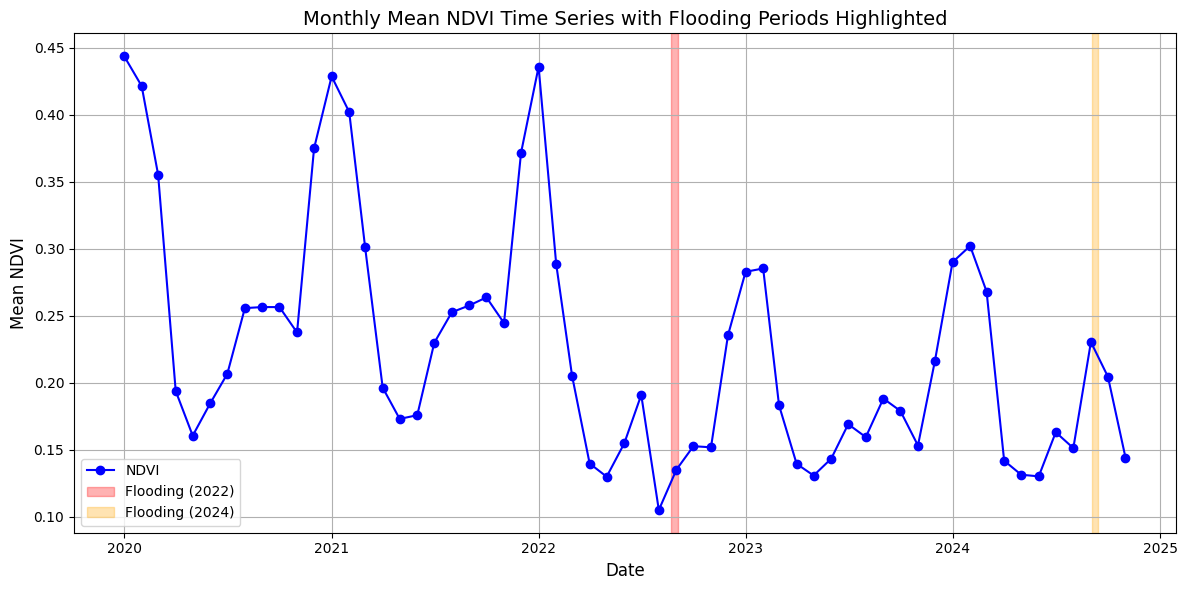

In [ ]:
# we create a collection of Sentinel 2 images from 2020 until 2024
sentinel2_collection = ee.ImageCollection('COPERNICUS/S2_SR') \
    .filterBounds(aoisar) \
    .filterDate('2020-01-01', '2024-11-26') \
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20))  # Filter out cloudy pixels

# we define a function to compute the NDVI by image
def calculate_ndvi(image):
    # Calculate NDVI: (NIR - Red) / (NIR + Red)
    ndvi = image.normalizedDifference(['B8', 'B4']).rename('NDVI')
    return image.addBands(ndvi)

# we apply the NDVI function to the image collection
ndvi_collection = sentinel2_collection.map(calculate_ndvi)

# we define a function to get the NDVI mean by image
def get_mean_ndvi(image):
    mean_ndvi = image.select('NDVI').reduceRegion(
        reducer=ee.Reducer.mean(),
        geometry=aoisar,
        scale=30,
        maxPixels=1e8
    )
    # Create a Feature with the date and mean NDVI
    date = ee.Date(image.get('system:time_start')).format('YYYY-MM-dd')
    return ee.Feature(None, {
        'date': date,
        'mean_ndvi': mean_ndvi.get('NDVI')
    })



ndvi_features = ndvi_collection.map(get_mean_ndvi)
ndvi_list = ndvi_features.getInfo()

dates = [x['properties']['date'] for x in ndvi_list['features']]
ndvi_values = [x['properties']['mean_ndvi'] for x in ndvi_list['features']]

ndvi_df = pd.DataFrame({'Date': pd.to_datetime(dates), 'NDVI': ndvi_values})

# we compute the NDVI mean by month
ndvi_df['Month'] = ndvi_df['Date'].dt.to_period('M')  # Convert dates to monthly periods
monthly_ndvi = ndvi_df.groupby('Month')['NDVI'].mean().reset_index()

monthly_ndvi['Month'] = monthly_ndvi['Month'].dt.to_timestamp()

# definition of flooding periods for the study
post_flood_start = pd.Timestamp('2022-08-22')
post_flood_end = pd.Timestamp('2022-09-03')
new_post_flood_start = pd.Timestamp('2024-09-03')
new_post_flood_end = pd.Timestamp('2024-09-14')

# we plot the monthly NDVI data
plt.figure(figsize=(12, 6))
plt.plot(monthly_ndvi['Month'], monthly_ndvi['NDVI'], marker='o', linestyle='-', color='b', label='NDVI')

# we display the flooding periods in red and orange
plt.axvspan(post_flood_start, post_flood_end, color='red', alpha=0.3, label='Flooding (2022)')
plt.axvspan(new_post_flood_start, new_post_flood_end, color='orange', alpha=0.3, label='Flooding (2024)')

plt.title('Monthly Mean NDVI Time Series with Flooding Periods Highlighted', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Mean NDVI', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The province of Sindh is situated in a tropical region, where it is hot, humid and very rainy in summer and cold and dry in winter.
The monthly NDVI data plot exhibits two yearly peaks in February and in October corresponding respectively to the winter crop season called 'rabi' (for wheat cultivation) and to the summer crop season called 'kharif' (for rice and cotton cultivation).
As one can see on the plot, there is no second yearly NDVI peak in 2022, which indicates that the damage and loss to the biomass greenness has been extremely severe for the summer crop production in the selected geographical area. This is confirmed by the reference paper which states that 2022 summer crop was completely lost due to floods in Sindh province.
In 2024 the second yearly NDVI peak is present, which indicates a lower damage and loss severity caused by flooding compared to 2022. The 2024 second peak has the same magnitude as the second peak in 2023 which was also a year with flooding in Sindh province. It is interesting to point out that those second peaks in 2023 and 2024 have a significant lower NDVI mean (around 0.20) than those in 2020 and 2021 (around 0.30) which were normal years without flooding in Sindh province.

### NDVI
In this section, the NDVI is calculated for vizualisation on the map in the geographical area of interest (for each time period of observation).

In [ ]:
# a function is defined to calculate the ndvi
def calculate_ndvi(image):
    ndvi = image.normalizedDifference(['B8', 'B4']).rename('NDVI')  # (NIR - Red) / (NIR + Red)
    return image.addBands(ndvi)

# all the retrieved images are combined into one single image for each period.
# we take the pixel with maximum NDVI from all the images to reduce cloud effects and to represent best NDVI for each period
pre_flood_ndvi = pre_flood_images.map(calculate_ndvi).select('NDVI').max()
post_flood_ndvi = post_flood_images.map(calculate_ndvi).select('NDVI').max()
new_post_flood_ndvi = new_post_flood_images.map(calculate_ndvi).select('NDVI').max()

# we clip the geographical area of interest
pre_flood_ndvi_clipped = pre_flood_ndvi.clip(aoisar)
post_flood_ndvi_clipped = post_flood_ndvi.clip(aoisar)
new_post_flood_ndvi_clipped = new_post_flood_ndvi.clip(aoisar)

# we plot the NDVI color scale map with one layer for each period
Map = geemap.Map()
Map.addLayer(aoisar)
Map.centerObject(aoisar,9);

Map.addLayer(pre_flood_ndvi_clipped, {'min': -0.2, 'max': 0.1, 'palette': ['red', 'orange', 'yellow', 'green']}, 'Pre-flood NDVI')
Map.addLayer(post_flood_ndvi_clipped, {'min': -0.2, 'max': 0.1, 'palette': ['red', 'yellow', 'green']}, 'Post-flood NDVI')
Map.addLayer(new_post_flood_ndvi_clipped, {'min': -0.2, 'max': 0.1, 'palette': ['red', 'yellow', 'green']}, 'New post-flood NDVI')

Map

Map(center=[27.674962642324985, 68.87499999999925], controls=(WidgetControl(options=['position', 'transparent_…

### Delta NDVI
In this section, the NDVI difference (or Delta NDVI) between the flooding period (2022 or 2024) and the reference period without flooding (2021) is calculated and visualized on the map with a color scale. More negative delta values (red color) indicate higher damage and loss to the biomass greenness. No difference (yellow color) means no damage and loss. And positive Delta NDVI (green color) translates into a favorable effect on the biomass greenness. A sliding bar on the map enables a direct severity comparison between the two periods. One can clearly see that 2024 crops have healthier biomass greenness values compared to 2022.

In [ ]:
# We calculate the 2022 delta NDVI (post 2022 - pre 2021)
delta_ndvi_2022 = post_flood_ndvi.subtract(pre_flood_ndvi).rename('Delta_NDVI_2022')

# We calculate the 2024 delta NDVI (post 2024 - pre 2021)
delta_ndvi_2024 = new_post_flood_ndvi.subtract(pre_flood_ndvi).rename('Delta_NDVI_2024')

 # Clip permet de visualiser que notre aoi
delta_ndvi_2022_clipped = delta_ndvi_2022.clip(aoisar)
delta_ndvi_2024_clipped = delta_ndvi_2024.clip(aoisar)

# we define a color scale on the map
vis_params = {'min': -0.5, 'max': 0.5, 'palette': ['red', 'yellow', 'green']}

# To create a sliding bar on the map, we first convert our GEE images into tile_layer
tile_layer_2022 = geemap.ee_tile_layer(delta_ndvi_2022_clipped, vis_params)
tile_layer_2024 = geemap.ee_tile_layer(delta_ndvi_2024_clipped, vis_params)

# we plot the map and define the geographical area of interest
Map = geemap.Map()
Map.centerObject(aoisar,9)


# we add Delta NDVI layers on the map
Map.addLayer(tile_layer_2022, {}, '2022 Delta NDVI')
Map.addLayer(tile_layer_2024, {}, '2024 Delta NDVI')

# we add the sliding bar on the map
Map.split_map(left_layer=tile_layer_2022, right_layer=tile_layer_2024)
Map



Map(center=[27.674962642324985, 68.87499999999925], controls=(ZoomControl(options=['position', 'zoom_in_text',…

### Crop visualization
In this section, we visualize where the crop is specifically located on the Delta NDVI map (loss and damage map to the biomass greenness) by applying the cropland mask derived from the ESA’s World Cover.

In [ ]:
# we clip the geographical area of interest on the Delta NDVI maps
delta_ndvi_2022_clipped = delta_ndvi_2022.clip(aoisar)
delta_ndvi_2024_clipped = delta_ndvi_2024.clip(aoisar)

# we plot the map with the Delta NDVI layers
Map = geemap.Map()
Map.centerObject(aoisar,10)

Map.addLayer(delta_ndvi_2022_clipped, vis_params , '2022 Delta NDVI')
Map.addLayer(delta_ndvi_2024_clipped, vis_params, '2024 Delta NDVI')

# we load the cropland mask (ESA World Cover)
cropland_mask = ee.Image('ESA/WorldCover/v100/2020').eq(40)  # Class 40 corresponds to cropland

Map.addLayer(cropland_mask, {'min': 0, 'max': 1, 'palette': ['white', 'green'],'opacity': 0.5}, 'ESA Cropland Mask')

Map

Map(center=[27.674962642324985, 68.87499999999925], controls=(WidgetControl(options=['position', 'transparent_…

### Damaged surface area
In this section, we compute the damaged crop surface area by using the ESA cropland mask and by selecting the surface area of interest with a Delta NDVI threshold less than -0.2 which is considered in the reference paper as "moderate damage".

In [ ]:
# we load the ESA cropland mask
esa_worldcover = ee.Image('ESA/WorldCover/v100/2020')
cropland_mask = esa_worldcover.eq(40)

# we define a mask with a Delta NDVI threshold < -0.2 (considered as 'moderate damage' in the reference paper) for each flood period
negative_delta_mask_2022 = delta_ndvi_2022.lt(-0.2)
negative_delta_mask_2024 = delta_ndvi_2024.lt(-0.2)

# we combine both masks
combined_mask_2022 = negative_delta_mask_2022.updateMask(cropland_mask)
combined_mask_2024 = negative_delta_mask_2024.updateMask(cropland_mask)

# we define pixel area of the combined mask for each flood period
pixel_area = ee.Image.pixelArea()

affected_area_2022 = pixel_area.updateMask(combined_mask_2022)
affected_area_2024 = pixel_area.updateMask(combined_mask_2024)


# we compute the surface area
stats_2022 = affected_area_2022.reduceRegion(
    reducer=ee.Reducer.sum(),
    geometry=aoisar,
    scale=10,  # Sentinel-2 resolution (10m)
    maxPixels=1e13
)
stats_2024 = affected_area_2024.reduceRegion(
    reducer=ee.Reducer.sum(),
    geometry=aoisar,
    scale=10,  # Sentinel-2 resolution (10m)
    maxPixels=1e13
)

# we get the result
total_area_m2_2022 = stats_2022.get('area').getInfo() / 1e6
total_area_m2_2024 = stats_2024.get('area').getInfo() / 1e6

# we print the result
print(f"Total affected area with moderate, severe or very severe crop damage in 2022 (km²): {total_area_m2_2022}")
print(f"Total affected area with moderate, severe or very severe crop damage in 2024 (km²): {total_area_m2_2024}")

Total affected area with moderate, severe or very severe crop damage in 2022 (km²): 231.68621749435673
Total affected area with moderate, severe or very severe crop damage in 2024 (km²): 71.63995458521329


The above result confirms the lower flood severity in 2024 in terms of damaged crop surface area.

## Results

### Comparison between 2022 and 2024
It's clear to see that the flooding in 2022 was more severe, covering a larger area (METTRE DONNEES SI ON LES A). This also makes sense as the flooding period and rainfall were bigger (EST-CE QU'ON A CES DONNEES?). Using the results from our calculations by combining both SAR and biomass health analysis, we can determine that the crop area that was in bad health and that was also flooded is .... in 2022 and ... in 2024. We can infer that this decrease in biomass greeenness and crop health is thus linked to the flooding and that the affected areas were much larger in 2022 than in 2024. The affected regions from our studied area are more or less the same???

### Biomass greenness decrease
We can guess that biomass greenness will decrease after flooding because we can imagine that the flood will hinder the normal development of the plants and they will not grow to be healthy. If we analyse the NDVI time series as well as our results, we can see that this decrease is different in the 2022 and 2024 floods.
In 2022, our theory may hold, but in 2024, there is no decrease in the mean NDVI for the same period. According to our results, there is still crop that is not in good shape but less than in 2024 (PUT RESULTS HERE). Why is that? Like mentioned above, there was also some flooding in 2023 and the NDVI had not decreased at that time either. It could be imaginable that following the 2022 floods, the plants adapted to a bigger quantity of water and now thrive better in these kind of conditions. We could also hypothesize that because of changes in climate, the tendancies are varying. This can probably affect the growth patterns and plant needs. Indeed, we can see that overall the NDVI means during the winter and summer seem to be decreasing in the five years of data that we have anaylsed. Of course, maybe the flood was just not impactful enough and the crops were not as affected.

## Conclusion

Based on the above analysis of the satellite derived data with all the investigated assessment methodologies, we can conclude that the loss and damage caused by the 2024 flood was less severe than during the 2022 flood in the geographical area of interest in terms of:

-NDVI (biomass greenness – Sentinel 2):

0,23 (in 2024) versus 0,13 (in 2022); 0,33=year without flood

-estimated flood extent (UN method – Sentinel 1):

98.074 hectares (2024) versus 406.715 hectares (2022)

-estimated number of exposed people (based on GHSL 2015 – 250m):

46.175 (2024) versus 308.444 (2022)

-estimated affected cropland (MODIS Land Cover 2020 – 500 m):

19.391 hectares (2024) versus 224.593 hectares (2022)

-estimated affected urban area (MODIS Land Cover 2020 – 500m):

649 hectares (2024) versus 973 hectares (2022)
